In [6]:
import json
import os
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
OUTPUT_DIR = "../results"

In [8]:
import matplotlib as mpl

plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["mathtext.fontset"] = "dejavuserif"

mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams["axes.labelsize"] = 28
mpl.rcParams['legend.fontsize'] = 30
mpl.rcParams['axes.titlesize'] = 28

In [9]:
colors = ["darkorange", "tab:blue", "forestgreen"]
model_names = ["No Balancing",  "One Iteration (CLIP)",  "Two Iterations"]
markers = ["s", "o", "^"]

def load_result(model_name, dataset, ckpt):
    root = os.path.join(OUTPUT_DIR, model_name)
    with open(os.path.join(root, f"{dataset}_{ckpt}.json")) as f:
        result = json.load(f)
    return result

def create_ax(ax, embed_str, batch_str, dataset, metric="mean_per_class_recall"):
    checkpoints = np.arange(500, 5001, 500)
    for i, model_type in enumerate(["joint", "clip", "double"]):
        model_name =  f"{model_type}_{embed_str}{batch_str}"
        perf = np.array([load_result(model_name, dataset, ckpt)['metrics'][metric] for ckpt in checkpoints])
        perf = np.maximum.accumulate(perf)
        ax.plot(checkpoints, perf, color=colors[i], marker=markers[i], markersize=10, label=model_names[i])

Text(0.77, 1.03, 'GPT-2 Text Embeddings')

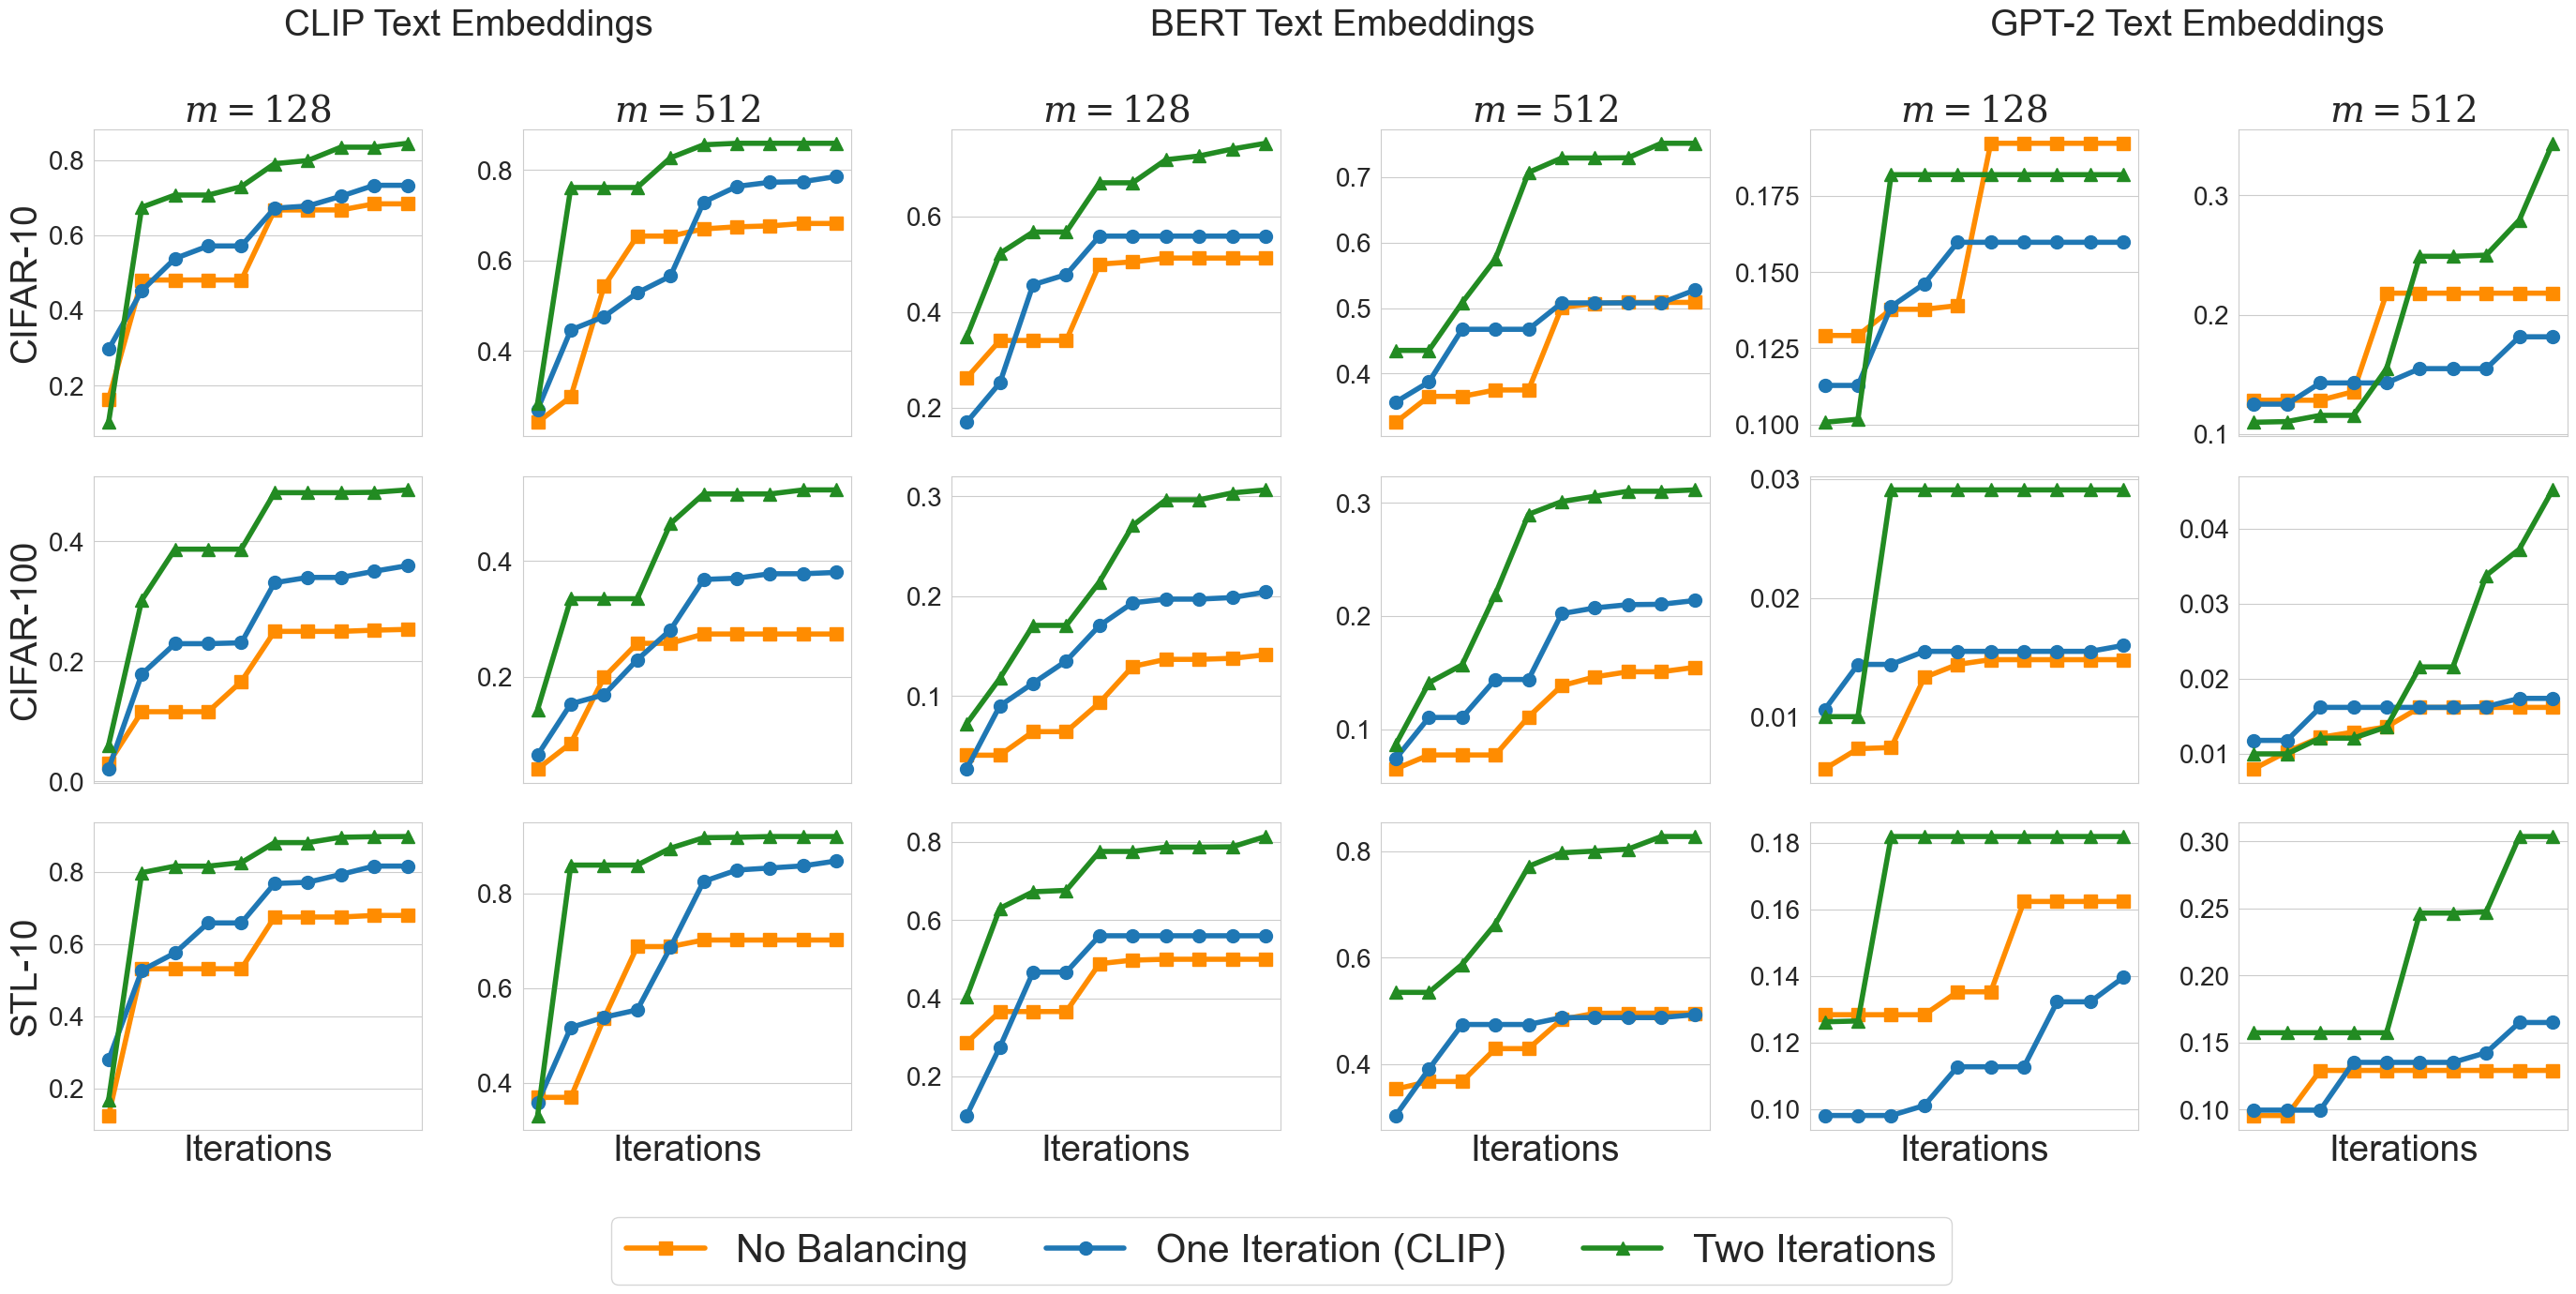

In [10]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(3, 6, figsize=(28, 12), sharex=True)


datasets = ["cifar10", "cifar100", "stl10"]
dat_names = ["CIFAR-10", "CIFAR-100", "STL-10"]

ticks = {
    "cifar10": [0.2, 0.4, 0.6, 0.8],
    "cifar100": [0.0, 0.2, 0.4, 0.6],
    "stl10": [0.2, 0.4, 0.6, 0.8],
}
embed_str = "separate"
offset = 0
for i, dataset in enumerate(datasets):
    axes[i, 0].set_ylabel(dat_names[i])
    for j, batch_str in enumerate(["_b128", ""]):
        create_ax(axes[i, j + offset], embed_str, batch_str, dataset)
        if not i == len(datasets) - 1:
            axes[i, j + offset].set_xticks([])
    axes[0, 0 + offset].set_title(r"$m = 128$")
    axes[0, 1 + offset].set_title(r"$m = 512$")
    axes[2, 0 + offset].set_xlabel("Iterations")
    axes[2, 1 + offset].set_xlabel("Iterations")

ticks = {
    "cifar10": [0.2, 0.4, 0.6, 0.8],
    "cifar100": [0.0, 0.1, 0.2, 0.3],
    "stl10": [0.2, 0.4, 0.6, 0.8],
}
embed_str = "bert"
offset = 2
for i, dataset in enumerate(datasets):
    for j, batch_str in enumerate(["_b128", ""]):
        create_ax(axes[i, j + offset], embed_str, batch_str, dataset)
        if not i == len(datasets) - 1:
            axes[i, j + offset].set_xticks([])
    axes[0, 0 + offset].set_title(r"$m = 128$")
    axes[0, 1 + offset].set_title(r"$m = 512$")
    axes[2, 0 + offset].set_xlabel("Iterations")
    axes[2, 1 + offset].set_xlabel("Iterations")

ticks = {
    "cifar10": [0.1, 0.125, 0.15, 0.175],
    "cifar100": [0.0, 0.01, 0.02, 0.03],
    "stl10": [0.1, 0.13, 0.16, 0.19],
}
embed_str = "gpt"
offset = 4
for i, dataset in enumerate(datasets):
    for j, batch_str in enumerate(["_b128", ""]):
        create_ax(axes[i, j + offset], embed_str, batch_str, dataset)
        if not i == len(datasets) - 1:
            axes[i, j + offset].set_xticks([])
    axes[0, 0 + offset].set_title(r"$m = 128$")
    axes[0, 1 + offset].set_title(r"$m = 512$")
    axes[2, 0 + offset].set_xlabel("Iterations")
    axes[2, 1 + offset].set_xlabel("Iterations")


handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles=handles, labels=labels, loc='center',
        bbox_to_anchor=(0.5, -0.05), ncol=3)


fig.tight_layout(pad=2.0)
fig.text(0.12, 1.03, "CLIP Text Embeddings", fontsize=28)
fig.text(0.45, 1.03, "BERT Text Embeddings", fontsize=28)
fig.text(0.77, 1.03, "GPT-2 Text Embeddings", fontsize=28)